In [1]:
import os

import numpy             as np
import matplotlib.pyplot as plt

from scipy import fft
from scipy import signal

from scipy.signal import butter
from scipy.signal import cheby1

# output config
np.set_printoptions(suppress=True)

In [50]:
def freqz(b, a, sr=1000.):
    w, h = signal.freqz(b,a)
    H    = 20*np.log10(np.abs(h) + 1E-6)
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0, sr/2, H.shape[0])
    #
    return w, W, H
#
def freqz_plot(b, a, sr, color='blue'):
    w, w_hz, h_hz = freqz(b, a, sr)
    #
    plt.figure('Magnitud', figsize=(12,8))
    plt.title('Magnitud [dB]')
    plt.grid(True)
    plt.plot(w, h_hz, linewidth=3, color=color)
    #
    plt.figure('Fase', figsize=(12,8))
    plt.title('Fase [grados]')
    plt.plot(w, w_hz, linewidth=3, color=color)
    plt.grid(True)
#
def spectrum(xt, sr, zoom='full'):
    L = xt.shape[0]
    #
    Xjw  = fft.fft(xt)
    #freq = fft.fftfreq(L, 1/sr)
    freq = np.linspace(0, sr/2, L//2)
    #
    # Mitad del espectro
    Xjw  = Xjw [:L//2]
    #
    if zoom=='full':
        a = 0
        b = int(sr*L//2)
    else:
        a, b = zoom
    #
    segment = s_slice(a, b, sr)
    Xjw  = Xjw [segment]
    freq = freq[segment]
    #
    # Magnitud en Decibeles
    Xjw_db = 20*np.log10(np.abs(Xjw))
    #
    # Plot
    plt.figure("Magnitud", figsize=(15, 6))
    plt.title("Magnitud [dB]")
    plt.plot(freq, Xjw_db)
    plt.grid(True)
#
def s_slice(t0, t1, sr):
    s0 = int(t0*sr)
    s1 = int(t1*sr)
    return slice(s0, s1)

In [3]:
n  = 2
fc = 10
sr = 100.
wc = 2*np.pi*fc
#wc = 2*fs*np.tan(np.pi*fc/sr)

# Dise√±o
b, a = butter(n, wc, analog=True, output='ba')

print(b.round(4))
print(a.round(4))

[3947.8418]
[   1.       88.8577 3947.8418]


In [4]:
bd, ad = signal.bilinear(b, a, sr)
print(f'[{bd}]\n[{ad}]')

[[0.06396438 0.12792877 0.06396438]]
[[ 1.         -1.16826067  0.42411821]]


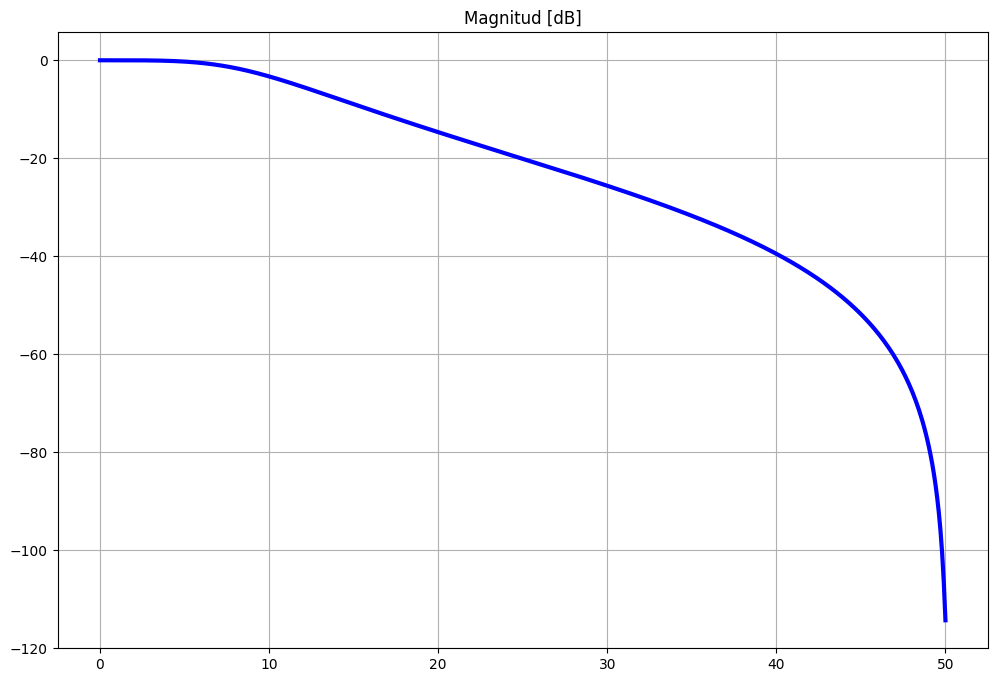

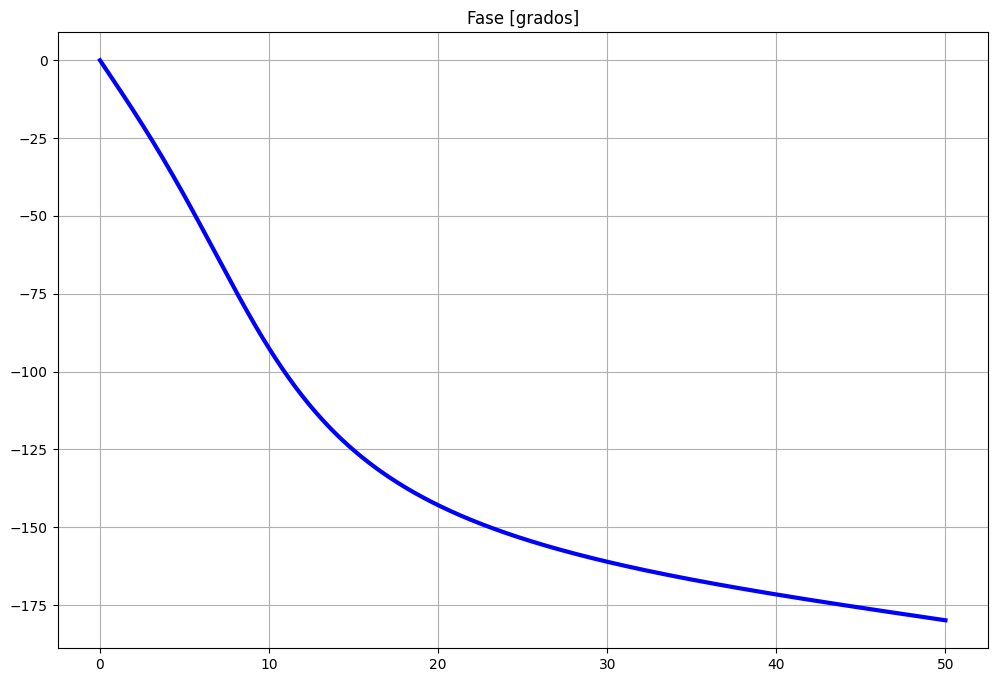

In [5]:
freqz_plot(bd, ad, sr)

[ 1.        -1.1429805  0.4128016]
[0.06745527 0.13491055 0.06745527]


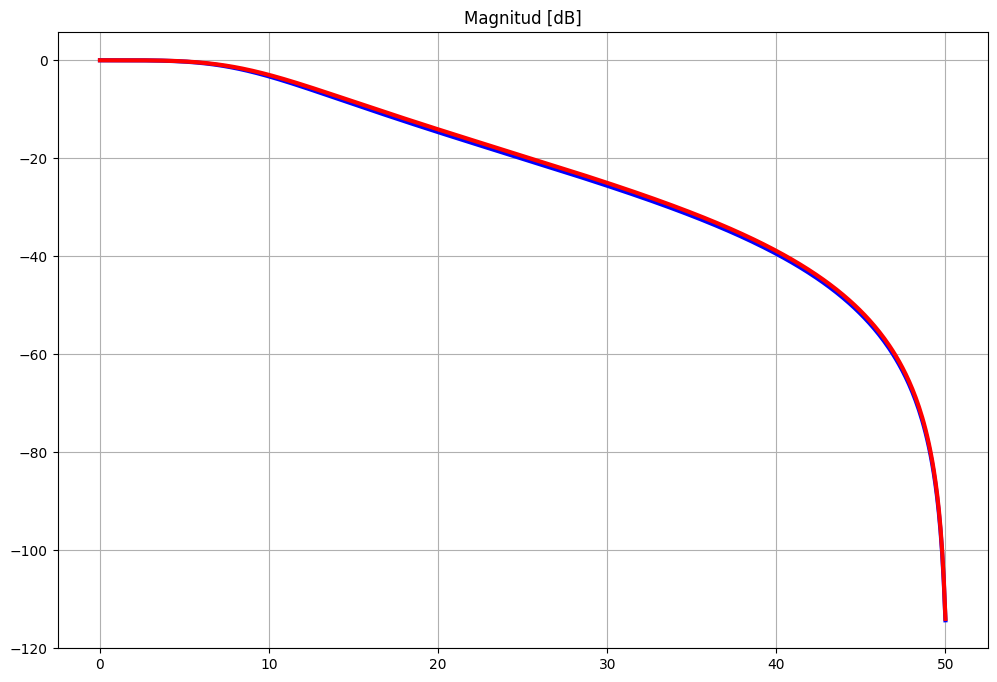

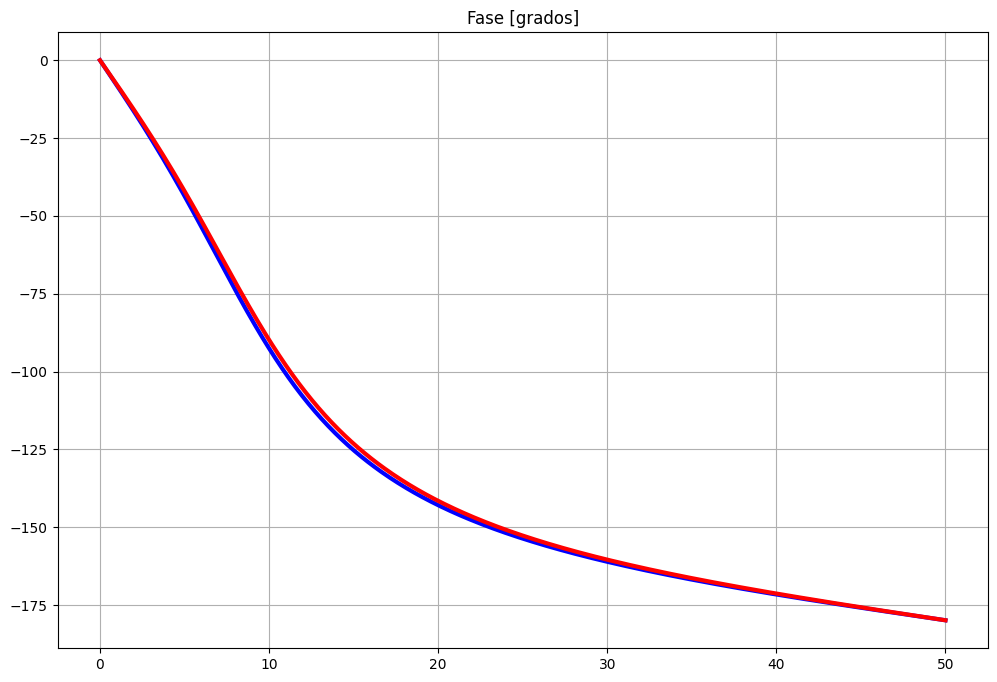

In [8]:
bd_f, ad_f = butter(n, 2*fc/sr)

print(f'{ad_f}\n{bd_f}')

freqz_plot(bd, ad, sr)
freqz_plot(bd_f, ad_f, sr, color='red')

In [7]:
print(f'''
{bd.round(4)} --> {bd_f.round(4)}
{ad.round(4)} --> {ad_f.round(4)}'''
)


[0.064  0.1279 0.064 ] --> [0.0675 0.1349 0.0675]
[ 1.     -1.1683  0.4241] --> [ 1.     -1.143   0.4128]


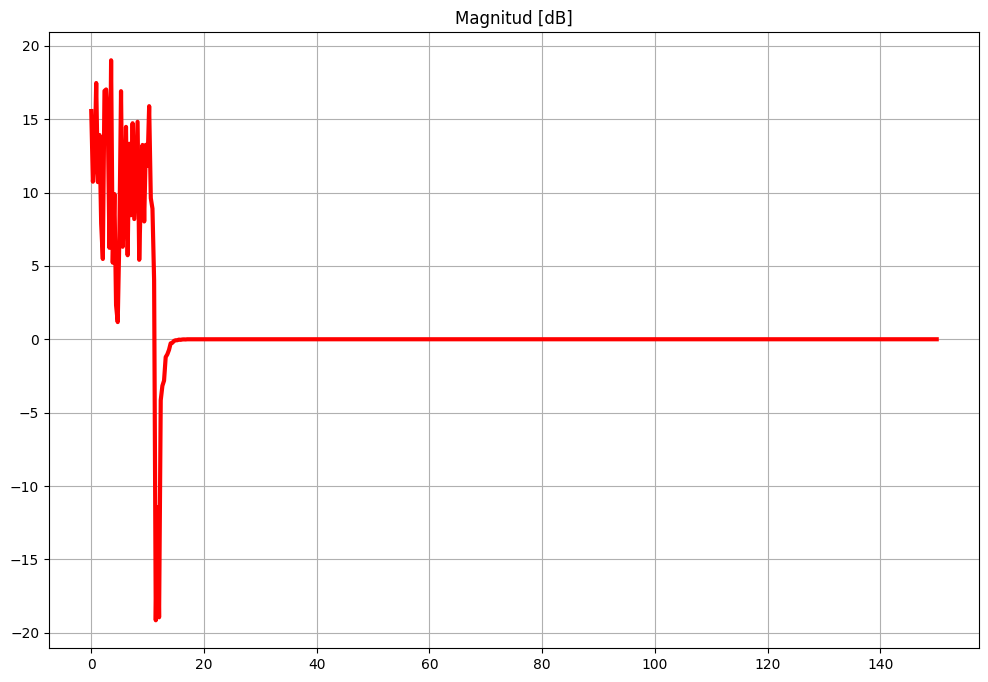

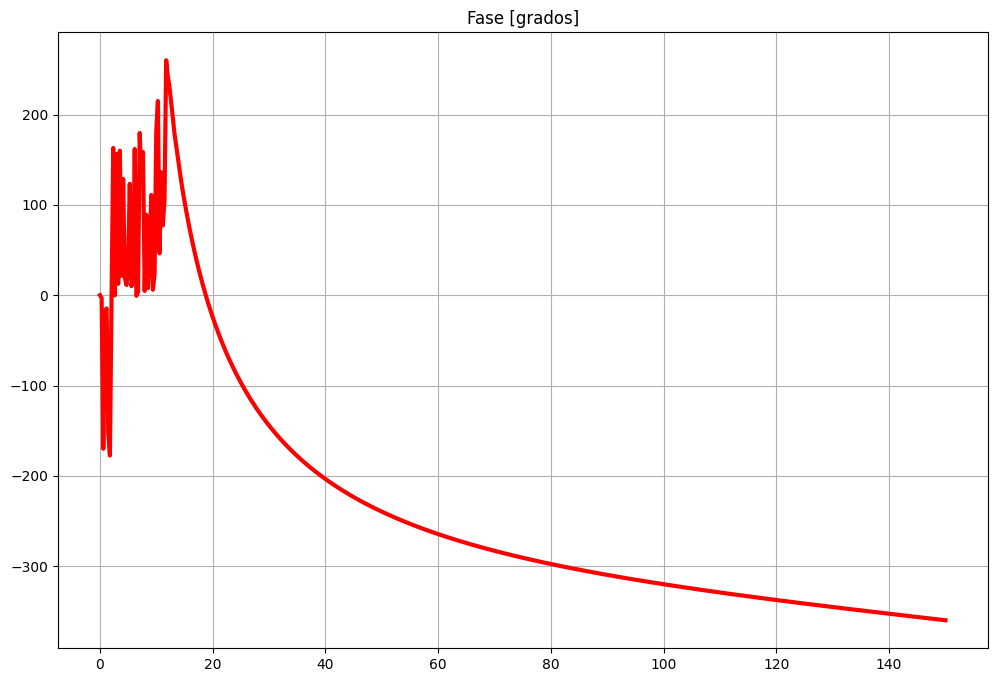

In [17]:
n = 18
sr = 300
bd_f, ad_f = butter(n, 2*fc/sr, btype='high')
freqz_plot(bd_f, ad_f, sr, color='red')

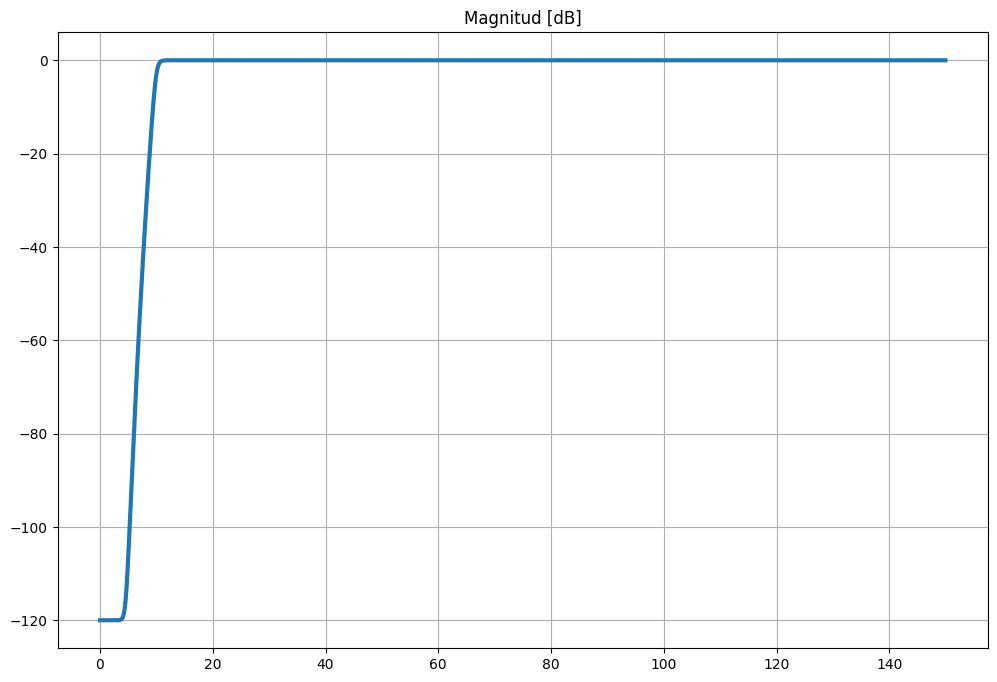

In [35]:
sos = butter(n, 2*fc/sr, output='sos', btype='high')
w, h = signal.sosfreqz(sos, worN=2**12, fs=sr)
h = 20*np.log10(np.abs(h) + 1E-6)
plt.figure('Magnitud', figsize=(12,8))
plt.title('Magnitud [dB]')
plt.grid(True)
plt.plot(w, h, linewidth=3)


In [36]:
import bioread

In [37]:
def get_relpath(pattern='../../'):
    path = os.getcwd()
    #
    relpath = os.path.relpath(path, pattern)
    path    = path.replace(relpath, '')
    #
    return path

In [38]:
path  = get_relpath() + 'data/'
fname = 'BIOPAC_I.acq'

data = bioread.read_file(path + fname)

In [39]:
data.channels

[Channel SpO2_1: 908505 samples, 1000.0 samples/sec, loaded: True,
 Channel SpO2_2: 908505 samples, 1000.0 samples/sec, loaded: True,
 Channel PPG_1: 908505 samples, 1000.0 samples/sec, loaded: True,
 Channel PPG_2: 908505 samples, 1000.0 samples/sec, loaded: True,
 Channel FFC_1: 908505 samples, 1000.0 samples/sec, loaded: True,
 Channel FFC_2: 908505 samples, 1000.0 samples/sec, loaded: True,
 Channel BP: 908505 samples, 1000.0 samples/sec, loaded: True,
 Channel ECG: 908505 samples, 1000.0 samples/sec, loaded: True]

In [40]:
n_chann = -1
sr  = data.channels[n_chann].samples_per_second
ecg = data.channels[n_chann].data
t   = data.channels[n_chann].time_index

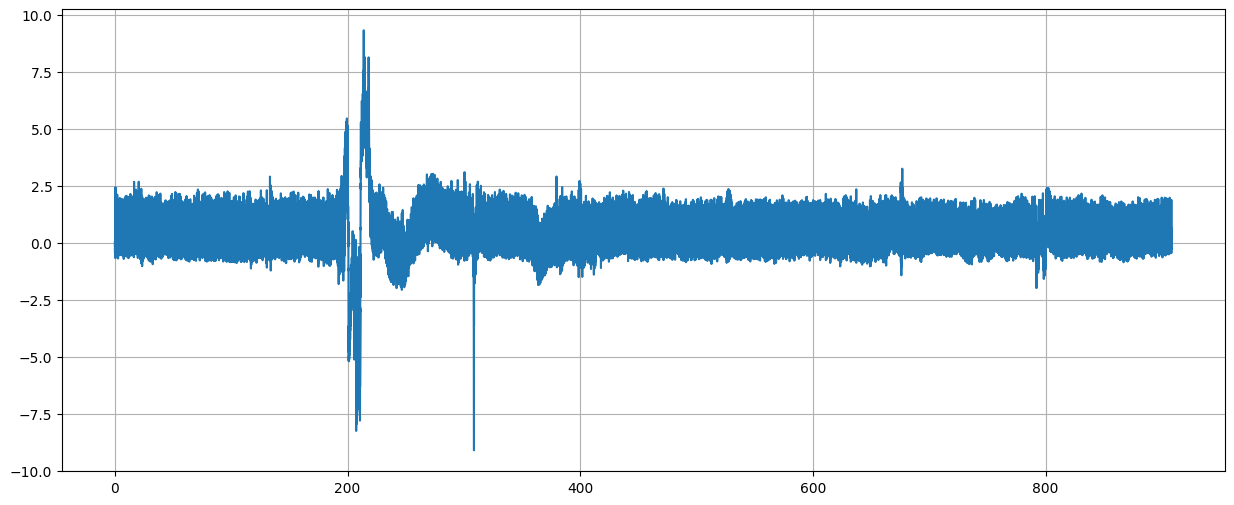

In [41]:
plt.figure('ECG', figsize=(15, 6))
plt.plot(t, ecg)
plt.grid(True)
plt.show()

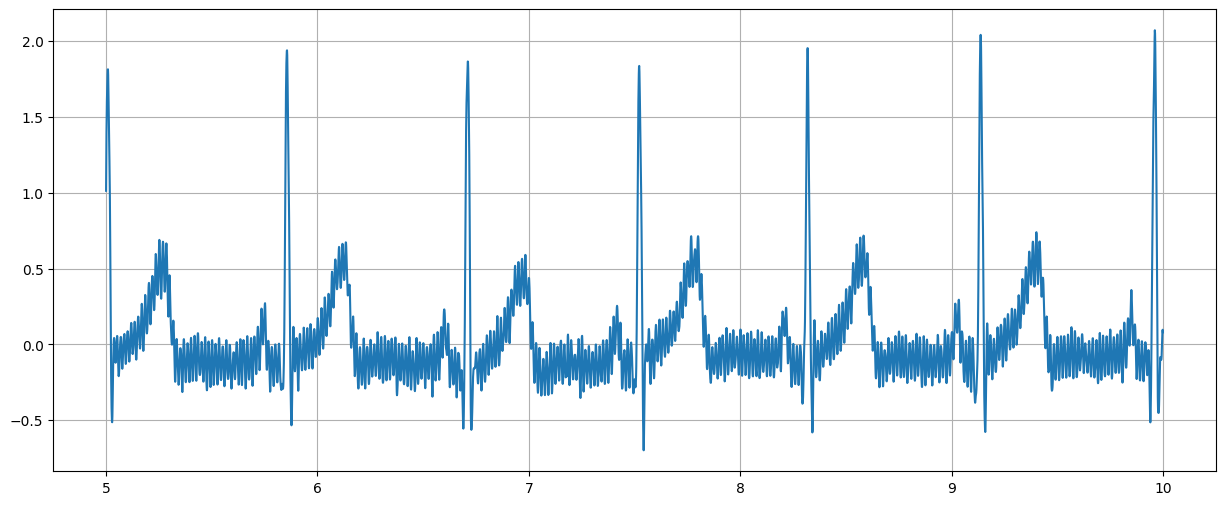

In [45]:
s = s_slice(5, 10, sr)
plt.figure('ECG', figsize=(15, 6))
plt.plot(t[s], ecg[s])
plt.grid(True)
plt.show()

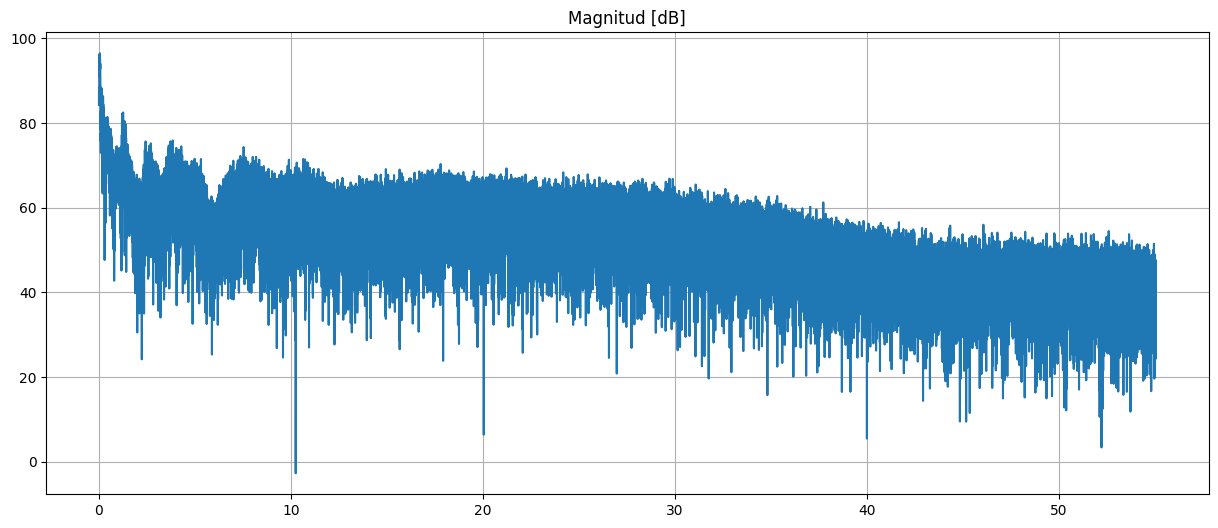

In [52]:
spectrum(ecg, sr, [0, 50])
plt.show()

[0.00018322 0.00073286 0.0010993  0.00073286 0.00018322]
[ 1.         -3.34406784  4.23886395 -2.40934286  0.5174782 ]


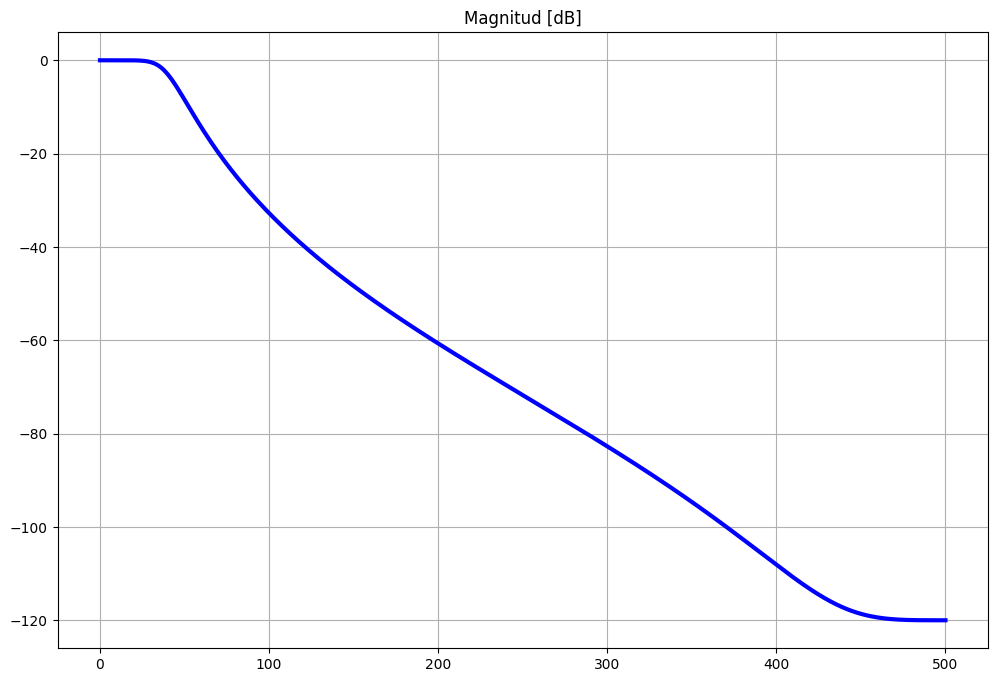

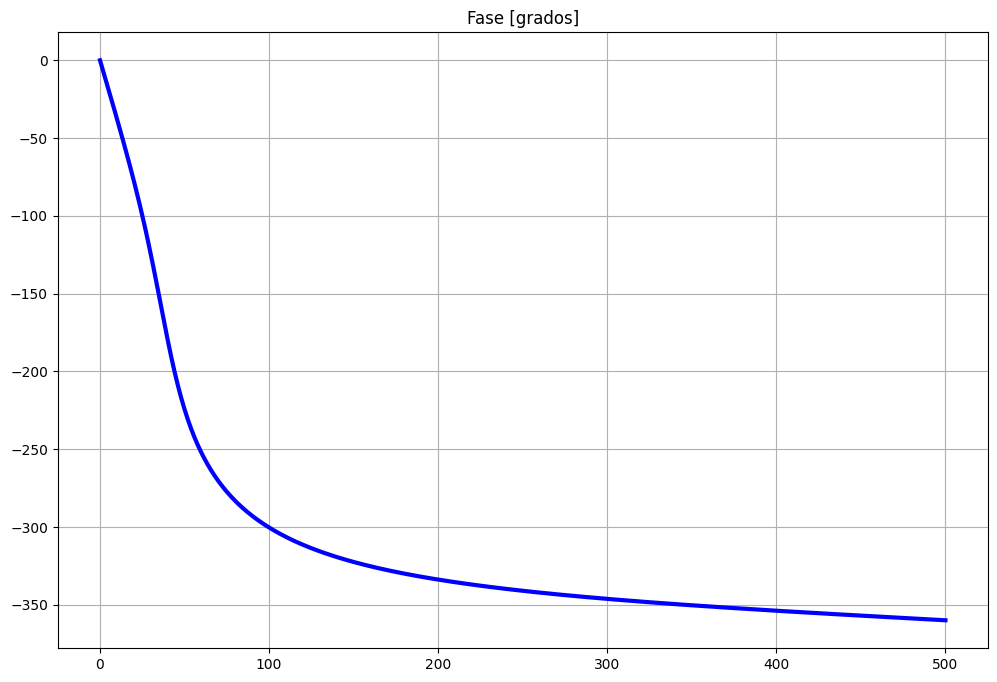

In [53]:
n      = 4
fc     = 40
bd, ad = butter(n, 2*fc/sr)

#Coeficientes
print(f'{bd}\n{ad}')

#Respuesta Filtro
freqz_plot(bd, ad, sr)

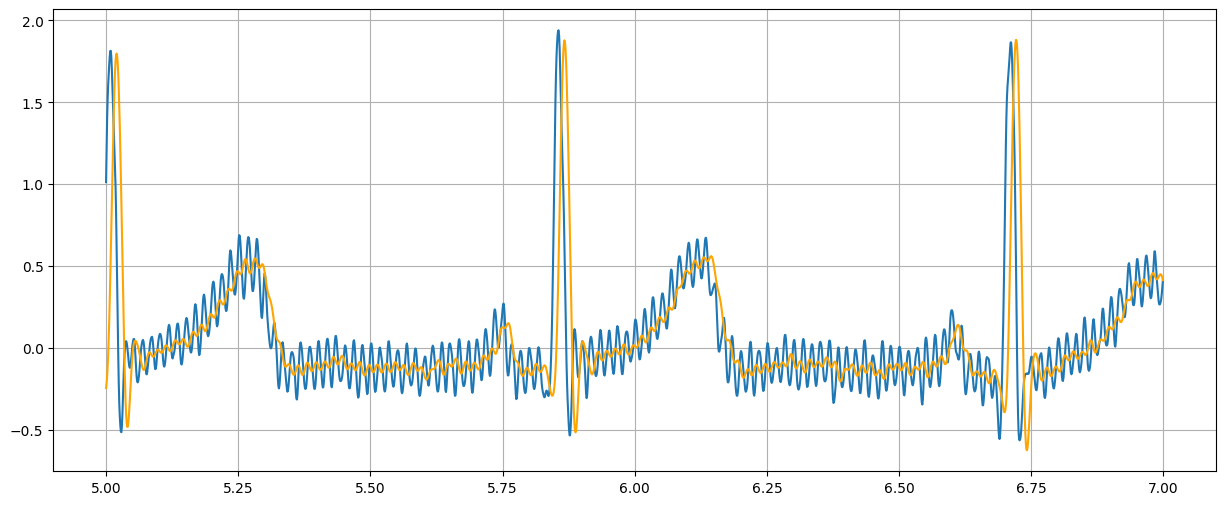

In [54]:
ecg_f = signal.lfilter(bd, ad, ecg)
#
s = s_slice(5, 7, sr)
plt.figure('ECG', figsize=(15, 6))
plt.plot(t[s], ecg  [s])
plt.plot(t[s], ecg_f[s], color='orange')
plt.grid(True)
plt.show()

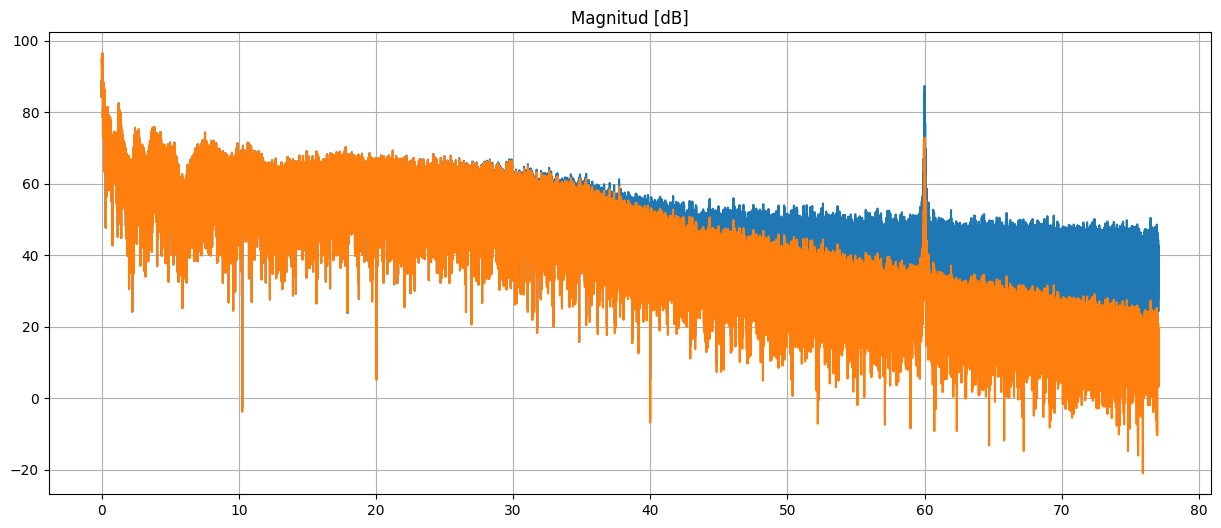

In [56]:
spectrum(ecg  , sr, [0, 70])
spectrum(ecg_f, sr, [0, 70])
plt.show()

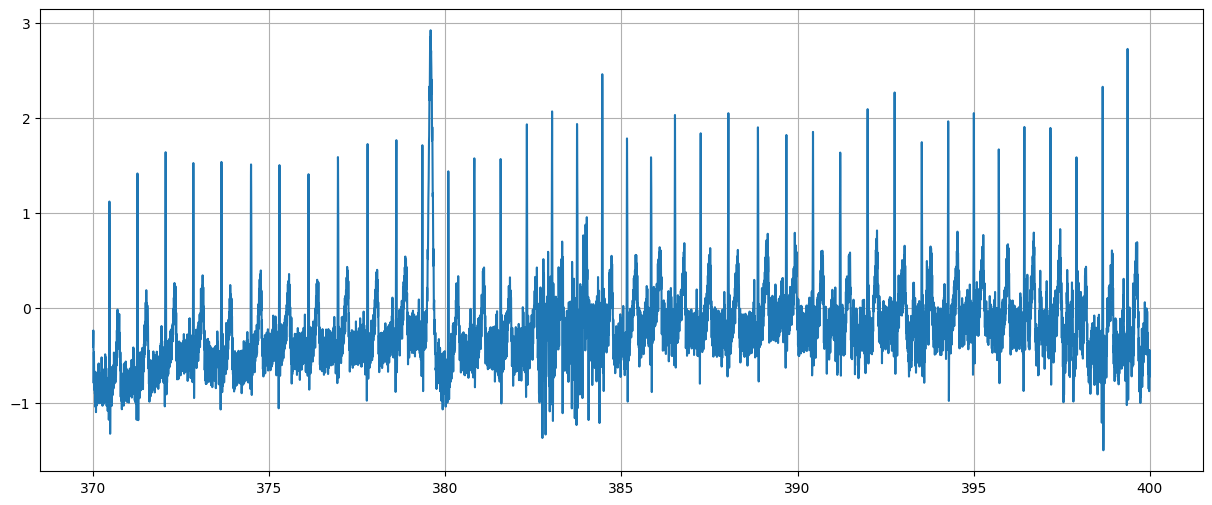

In [55]:
s = s_slice(370, 400, sr)
plt.figure('ECG', figsize=(15, 6))
plt.plot(t[s], ecg[s])
plt.grid(True)
plt.show()

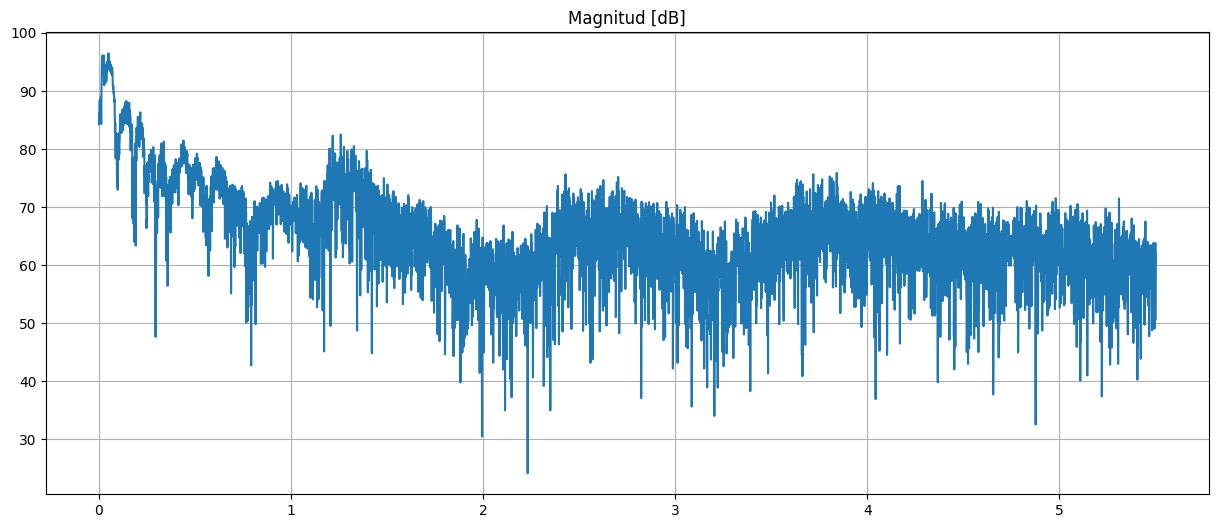

In [57]:
spectrum(ecg  , sr, [0, 5])
plt.show()

[ 0.00017486  0.         -0.00069943  0.          0.00104914  0.
 -0.00069943  0.          0.00017486]
[  1.          -7.34933005  23.65125216 -43.53501306  50.13593938
 -36.9920939   17.0779248   -4.51046272   0.52178339]


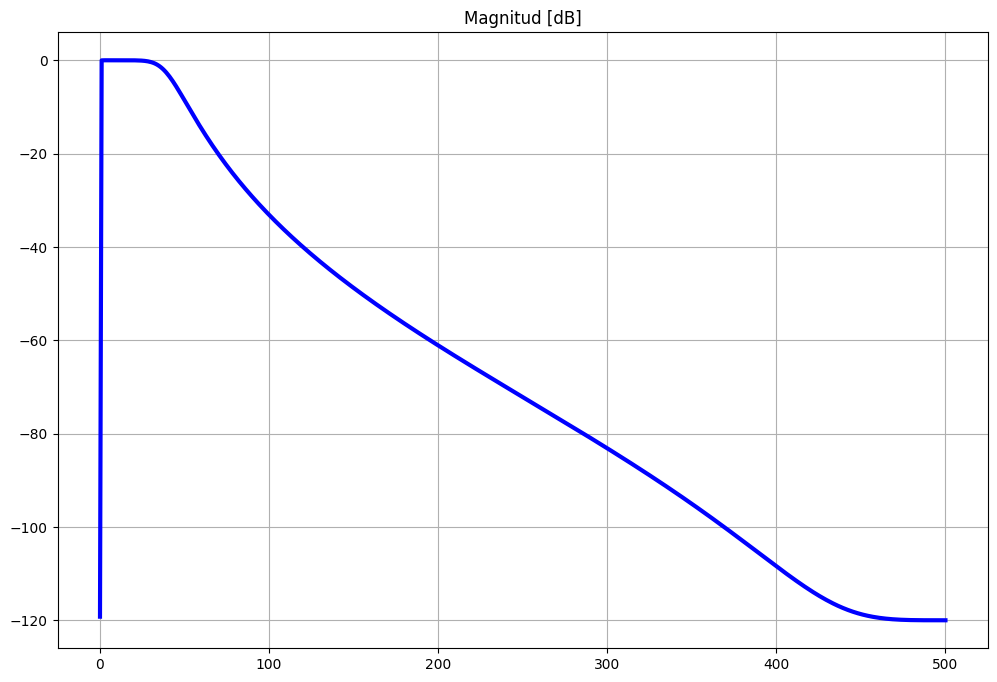

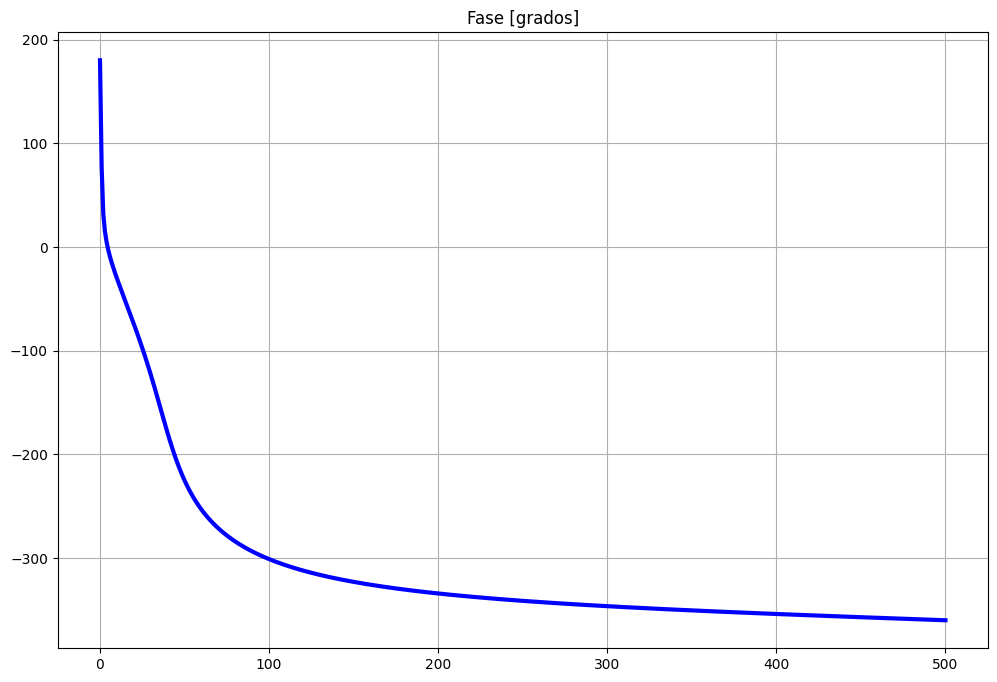

In [58]:
n      = 4
fc     = np.array([0.5, 40])
bd, ad = butter(n, 2*fc/sr , btype='bandpass')

#Coeficientes
print(f'{bd}\n{ad}')

#Respuesta Filtro
freqz_plot(bd, ad, sr)

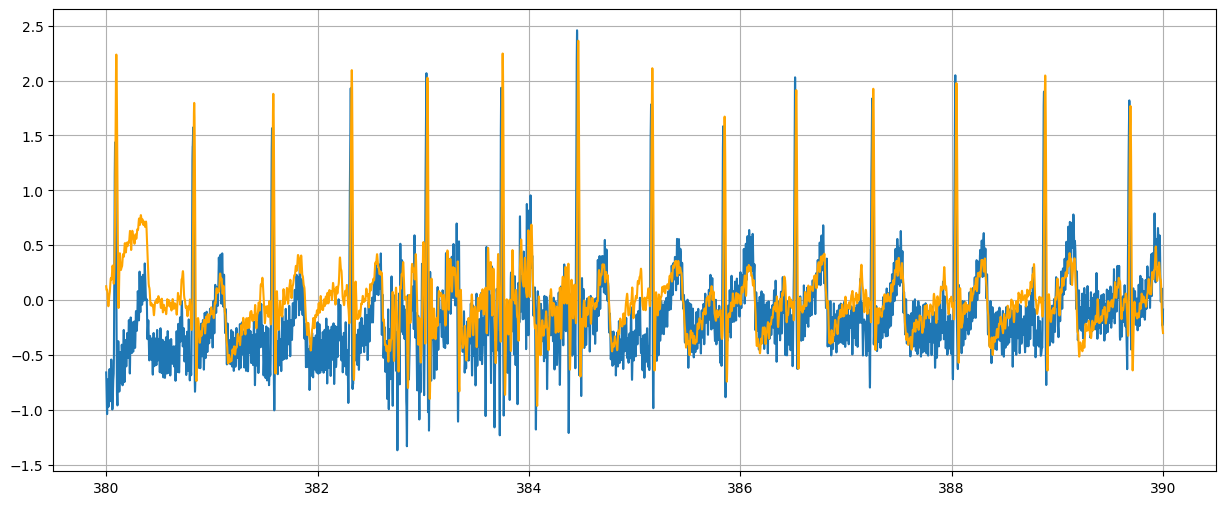

In [61]:
ecg_f = signal.lfilter(bd, ad, ecg)
#
s = s_slice(380, 390, sr)
plt.figure('ECG', figsize=(15, 6))
plt.plot(t[s], ecg  [s])
plt.plot(t[s], ecg_f[s], color='orange')
plt.grid(True)
plt.show()

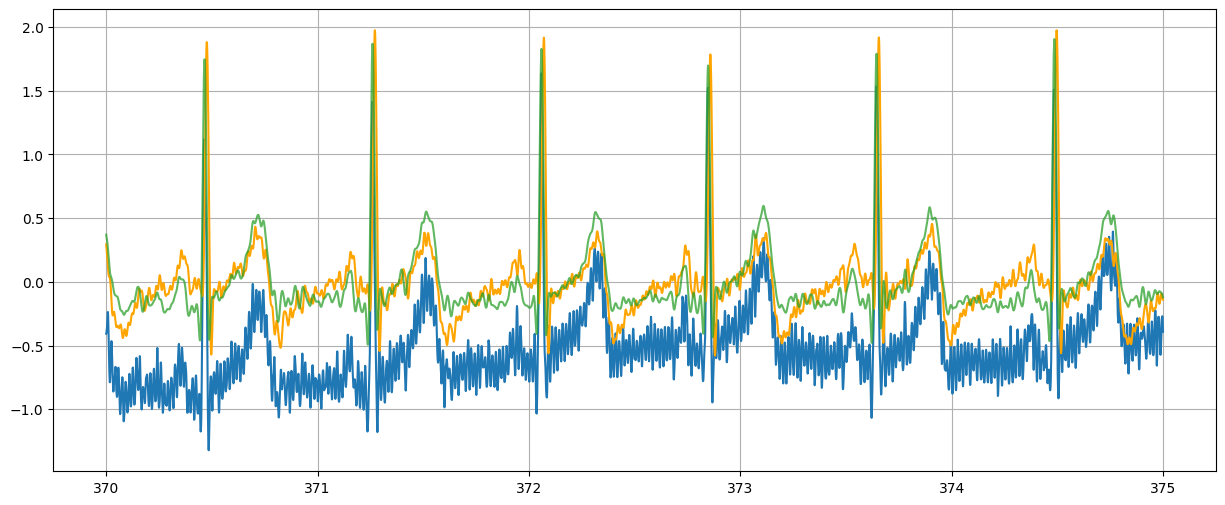

In [91]:
#ecg_f = signal.lfilter(bd, ad, ecg)
ecg_ff = signal.lfilter(bd, ad, ecg_f[::-1])[::-1]
#
s = s_slice(370, 375, sr)
plt.figure('ECG', figsize=(15, 6))
plt.plot(t[s], ecg   [s])
plt.plot(t[s], ecg_f [s], color='orange')
plt.plot(t[s], ecg_ff[s], color='tab:green', alpha=0.75)
plt.grid(True)
plt.show()

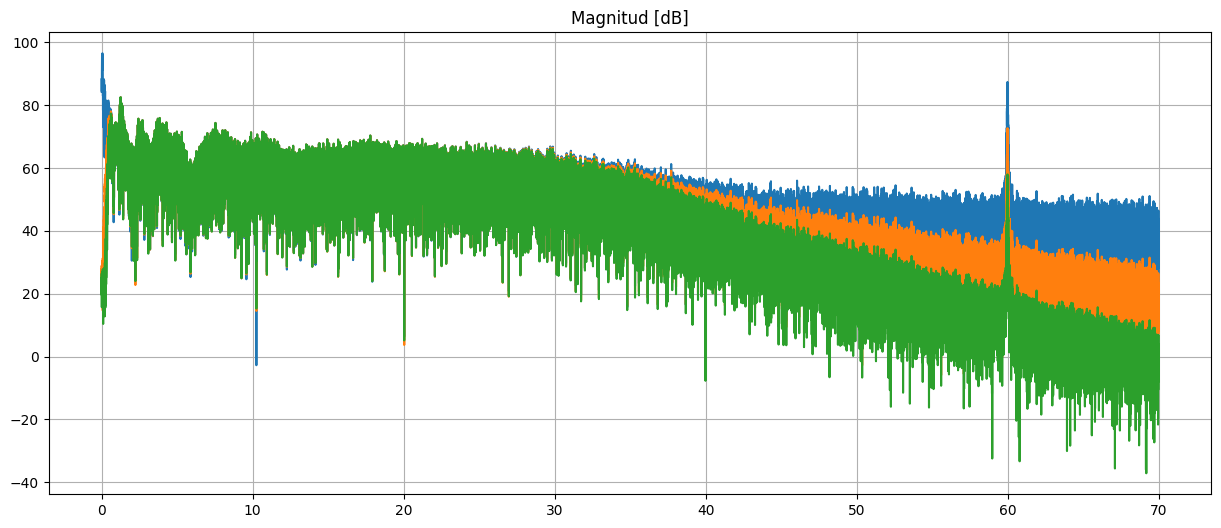

In [94]:
spectrum(ecg   , sr, [0, 70])
spectrum(ecg_f , sr, [0, 70])
spectrum(ecg_ff, sr, [0, 70])
plt.show()